# Using Auto Regressive Integrated Moving Average (ARIMA) time series model to forecast price of Bitcoin.

    #Install the following libraries;
    #yfinance
    #Pandas
    #Numpy
    #Math
    #Matplotlib
    #scikit-learn (imported as sklearn)
    #statsmodels

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf

In [8]:
ticker = "BTC-USD"
data = yf.download(ticker)

[*********************100%%**********************]  1 of 1 completed


In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-01-24,39877.593750,40483.785156,39508.796875,40077.074219,40077.074219,22359526178
2024-01-25,40075.550781,40254.480469,39545.664062,39933.808594,39933.808594,18491782013
2024-01-26,39936.816406,42209.386719,39825.691406,41816.871094,41816.871094,25598119893


In [10]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [11]:
# next is to use 90% of our data as training set and the remaining 10% for our testing
# Train test split

to_row = int(len(data)*0.9)
training_data = list(data[0:to_row]['Adj Close'])
testing_data = list(data[to_row:]['Adj Close'])

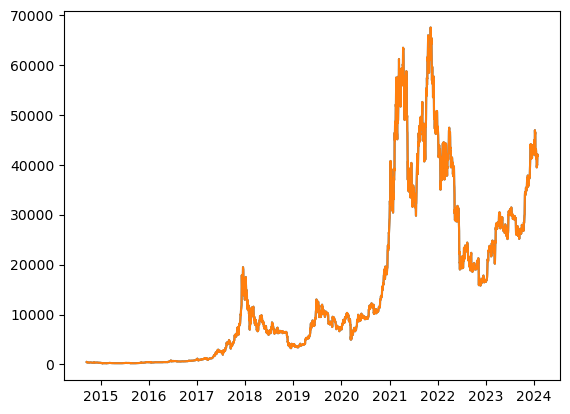

In [12]:
#you can plot the graph with the date in index
plt.plot(data.index, data['Adj Close'])
# or reset the index and have date as a column
data.reset_index(inplace=True)
plt.plot(data['Date'], data['Adj Close'])


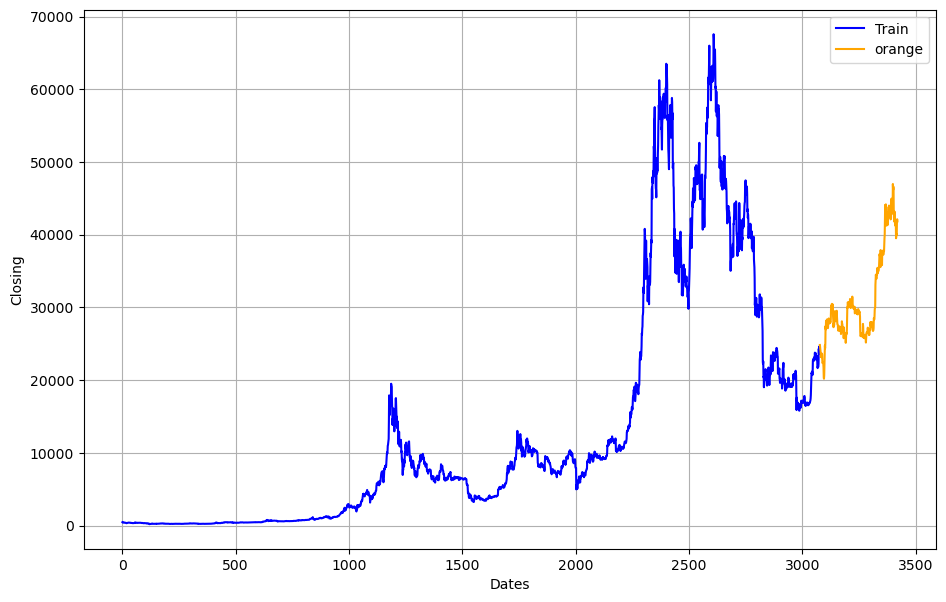

In [13]:
#split data into train and test set
plt.figure(figsize = (11,7))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing')
plt.plot(data[0:to_row]['Adj Close'], 'blue', label = 'Train')
plt.plot(data[to_row:]['Adj Close'], 'orange', label = 'orange')
plt.legend()


In [14]:
model_predictions = []
n_test_obser = len(testing_data)


In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output)[0]
#if your list has more than one result use "yhat = list(output[0])[0]" to use the first number
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)
    

In [17]:
list(output)[0]

42131.7686145396

In [23]:
len(model_predictions)

343

In [19]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3420
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -27645.096
Date:                Sun, 28 Jan 2024   AIC                          55300.193
Time:                        19:49:28   BIC                          55330.878
Sample:                             0   HQIC                         55311.157
                               - 3420                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0288      0.009     -3.160      0.002      -0.047      -0.011
ar.L2          0.0091      0.009      1.041      0.298      -0.008       0.026
ar.L3          0.0213      0.009      2.258      0.0

In [20]:
len(testing_data)

343

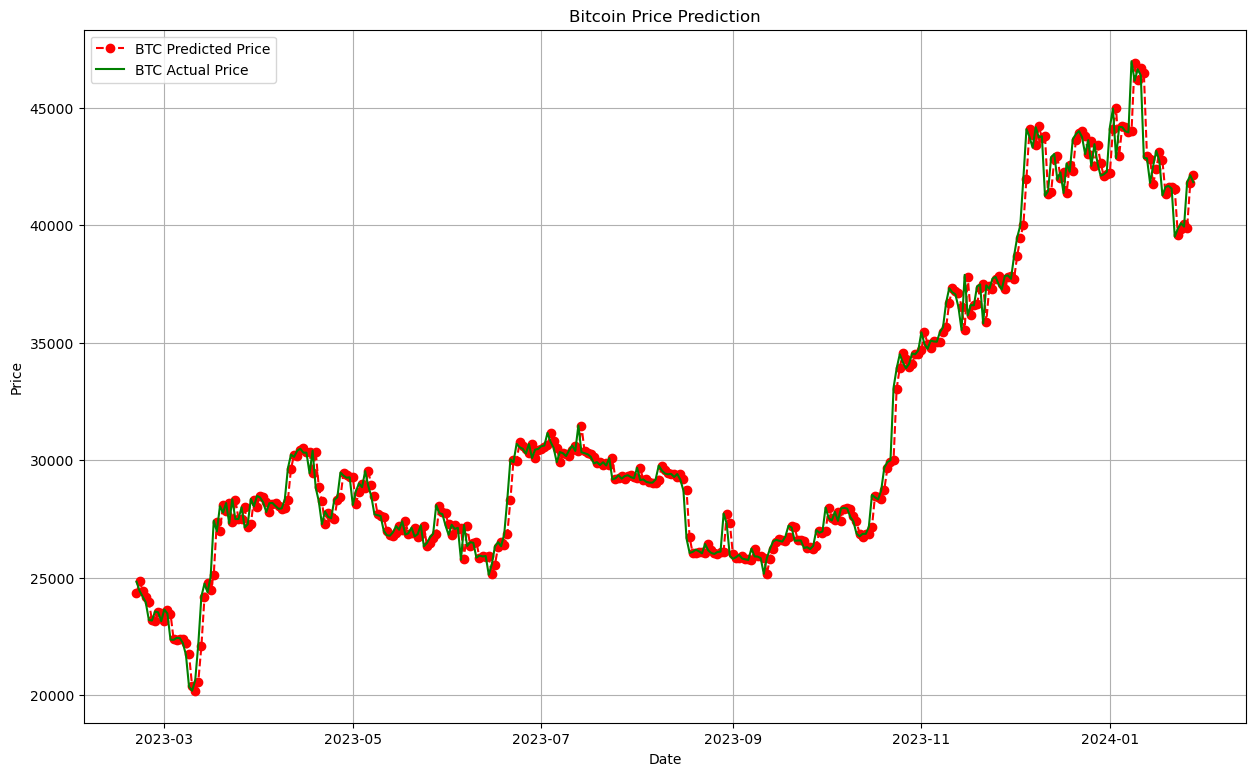

In [26]:
plt.figure(figsize = (15,9))
plt.grid(True)
date_range = data[to_row:]['Date']
plt.plot(date_range, model_predictions, color = 'red', marker = 'o', linestyle = 'dashed', label = 'BTC Predicted Price')
plt.plot(date_range, testing_data, color = 'green', label = 'BTC Actual Price')
# check your 'model_predictions' and 'testing_data' have the same length or else you will get error    
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#As shown the red 'Predicted' values are closely correlated with green 'Actual' values.